# ASSIGNMENT 2: Discrete Fourier Transform

Many signals are easier to understand in the frequency domain than in the time domain. Examples include audio (music and speech), vibration measurements, biomedical signals, and communication signals. The Discrete Fourier Transform (DFT) maps a finite-length discrete-time signal into a set of frequency components. In practice, the DFT answers questions such as: Which frequencies are present, how strong they are, and what their relative phases are.

A common use case is **spectral analysis** of audio. A musical note is not a single sine wave: it usually contains a fundamental frequency and multiple harmonics. The DFT makes these components visible as peaks in the amplitude spectrum. This is also one of the reasons why frequency-domain tools are used in audio coding, noise reduction, and music information retrieval.

Image: example of a time-domain audio waveform and its amplitude spectrum.
![Example of a time-domain audio waveform and its amplitude spectrum](music_spectral_analysis.jpg)


DFT and FFT are closely related but not the same concept. The **DFT** is the mathematical transform. The **FFT** (Fast Fourier Transform) is a family of algorithms that compute the DFT efficiently. For an input of length N, a direct DFT computation scales on the order of N² operations, while FFT-based computation typically scales on the order of N log₂(N). In software, functions named fft compute the DFT result using an FFT algorithm. In this assignment, `np.fft.fft` returns the DFT of your signal. More info about the FFT algorithm implementation can be found in the next link: https://en.wikipedia.org/wiki/Fast_Fourier_transform

In this assignment, you will generate a signal that contains two sine components, compute its DFT, and interpret the amplitude spectrum. You will also practice building a correct frequency axis and using **normalized frequency** when plotting spectra.



## Computing the DFT in Python (NumPy FFT)
The discrete Fourier transform, or DFT, is the primary tool of digital signal processing. NumPy's `fft` package provides the
functions `fft` and `ifft` to compute the discrete Fourier transform and its inverse, respectively. For the input
signal x its transformed version X is a complex function of frequency. The transform can be presented as $X(ω)
= r(ω)exp(jΦ(ω))$, where the absolute value $r(ω)$ is the amplitude spectrum of the signal and $Φ(ω)$ the phase
spectrum. In Python the amplitude and phase spectrums can be calculated with commands:

```python
Y = np.fft.fft(y)
m = np.abs(Y)
p = np.angle(Y)
```
or
```python
p = np.unwrap(np.angle(Y))
```
which corrects the phase angles in the array **p** by adding multiples of ±2π.

The function `fft` creates a DFT between frequencies f = [0,fs]. Because the sampled signal contains only the
frequencies [0,fs/2], the frequencies between [fs/2,fs] are so called mirror frequencies, which are caused by the
symmetrical properties of the transform.

When an amplitude or phase spectrum is plotted, the values (from 0 to sampling frequency fs) have to be created
for the x-axis. This is done by using a frequency vector **ff** which contains the values [0: fs] and the same number of
elements as <b>Y</b>. **ff** can be created as follows:
```python
ff = fs*np.arange(0, len(Y)) / len(Y)
```
fs is expressed in Hz or when normalized frequencies are used, fs=1. The amplitude spectrum and phase spectrum
are plotted with the commands
```python
plt.stem(ff, m) # amplitude spectrum of the signal
plt.stem(ff, p) # phase spectrum of the signal
```

Start by running the code block below to load the Python packages required to complete this assignment. To run the code, select the code block and push Ctrl+Enter or click the Run button.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Task 2.1.** Create a digital signal s that is a sum of 2 sine wave components s1 and s2 with the
following parameters:

| Signal | Amplitude | Frequency | Sampling frequency | Length | Phase angle |
| ------ |:---------:|:---------:|:------------------:|:------:|:-----------:|
| s1     | 1         | f         |       300 Hz       | 1 s    | 0           |
| s2     | 0.5       | f + 30 Hz |       300 Hz       | 1 s    | π/2         |

Here, **f** is defined as the last two digits of your student number (in Hz). If the last two digits are **00**, use **f = 10 Hz**. Note that if **f = 0 Hz**, the first component **s1** with phase 0 would become identically zero, so using **f = 10 Hz** avoids this degenerate case.

Use the function sin_gen2 written in Assignment 1.
Plot the signal s.

In [2]:
def sin_gen2(A, f0, fs, t, fii, plot=False):
    """
    Generate and plot a discrete-time sine wave.
    
    Parameters:
    A :   amplitude
    f0 :  signal frequency in Hertz
    fs :  sampling frequency in Hertz
    t :   signal length in seconds
    fii : phase angle
    plot : whether the signal should be plotted
    
    Returns:
    s sinusoidal signal vector
    """
    # copy your implementation of sin_gen2 from Assignment 1 here
    Ts = 1 / fs
    n = np.arange(0, t+Ts, Ts)
    s = A * np.sin(2*np.pi*f0*n + fii)
    if plot:
        fig, ax = plt.subplots()
        ax.stem(n, s)
        ax.set_xlabel('time (s)')
    return s
    
    

Text(0.5, 0, 'time (s)')

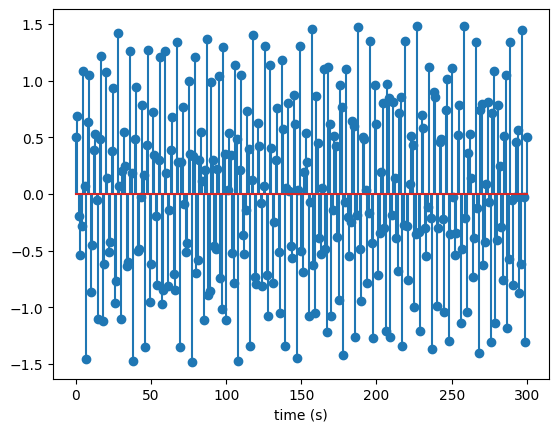

In [3]:
# form the signals and plot s
s1 = sin_gen2(1, 77, 300, 1, 0)
s2 = sin_gen2(0.5, 77 + 30, 300, 1, np.pi / 2)
s = s1 + s2

fig, ax = plt.subplots()
ax.stem(s)
ax.set_xlabel('time (s)')

**Task 2.2.** Plot the amplitude spectrum of the signal s as a function of **normalized frequency**.

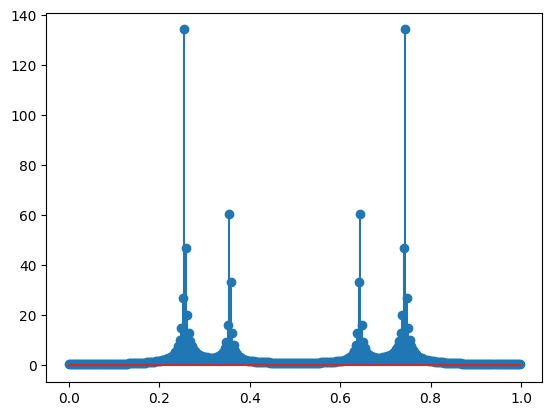

In [4]:
# calculate the frequency response using fft
Y = np.fft.fft(s)

# take the absolute value of the fft to get the amplitude spectrum
m = np.abs(Y)


# form the vector ff and plot the amplitude spectrum
fs = 1
ff = fs*np.arange(0, len(Y)) / len(Y)

plt.stem(ff, m) # amplitude spectrum of the signal
plt.show()



### Instructions for submission
1. Make sure that your code produces the desired results from scratch by selecting Kernel -> Restart & Run all. This will clear the output of your code and run all the code cells again from top to bottom.

2. Rename this notebook to `DF_Assignment2_firstname_lastname_studentnumber.ipynb`.

3. Submit only the resulting notebook (.ipynb file) to the return box in Moodle. Send your submission before the deadline to receive additional week exam points.